# Exploratory data analysis about recent history of the Olympic Games

Goal is to explore a dataset on the modern summer Olympic Games, from Athens 1896 to Rio 2016 and try to find hidden patterns, actionable insights from dataset.

**Content**

The file summer_olympic.csv contains 31165 rows and 9 columns; Each row corresponds to individuals winning medals at summer Olympics Games.
This will be primary dataset for EDA about this project.
Columns in this dataset are:

1. Year - Year in which event took place;
2. City - City where event took place;
3. Sport - Sport category;
4. Discipline - Discipline category;
5. Athlete - Athlete's name;
6. Country - Winning Country;
7. Gender - Male or Female athelete;
8. Event - Sport event;
9. Medal - Winning medal Gold,Silver,Bronze;


The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event. Source of this file : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
We will be also making use of noc_regions.csv file to rename country names from the same source.
GDP data and 2017 world happiness index from https://www.kaggle.com/unsdsn/world-happiness, we can also use these to see any relevant insights.

We will use these 4 datasets as supportive objects.

![Picture by Time.com](https://d57439wlqx3vo.cloudfront.net/iblock/673/6732796c241559370ce85aab62e0f7be/823e81e8f7e52f89ea3ccd53e6a8f632.png)

# Introduction 

The story of our civilizations goes long way back. The span of recorded history is roughly 5,000 years, beginning with Sumerian Cuneiform script; the oldest discovered form of coherent writing from the protoliterate period around the 30th century BC.
That 5000 years makes up literally 0.0000001% of what actually happened here.

Over the course of time, humans kept innovating their surroundings. They introduced society, culture, arts, science, engineering, sports, politics, economics into this world.

The characteristic trait of our species is that we have broken each other badly by fighting wars revolving around prides, ego etc. on so many occasions yet, we somehow always have found solace when it came to Sports or Entertainment.

Started merely as a sport event dedicated to the Gods, Olympics today has become the defining tradition of our species.
International events have triggerred massive variations in patterns of Olympic results.

Olympics started in 776 BC on plais of Olympia. They continued for nearly 12 centuries, until Emperor Theodosius decreed in 393 A.D. that all such "pagan cults" be banned.
The Olympic Games were closely linked to the religious festivals of the cult of Zeus, but were not an integral part of a rite. Indeed, they had a secular character and aimed to show the physical qualities and evolution of the performances by different individuals.

Modern day Olympics, however, are nowhere oriented towards religious ideologies. They are being organised since 1896, once in every 4 years, in different countries across continents.
The modern (summer) Olympics started in 1896. Due to logistic difficulties for organizing snow and ice events, the winter Olympics was started in 1924.

Sports goes into entertainment category as far as viewers are concerned.
But case is not the same when it comes to Athletes playing any Sport at Olympics.
Olympic athletes are considered as benchmarks in regards with their Strength, Agility and Intelligence.

Even participating in Olympics is not an easy feat. It demands lot of hard work, dedication.
If it were easy, then everyone would go around doing it. At the point, it wouldnt be considered as an achievement at all.
We will try to relate insights from this dataset to different things happening in cultures around the globe and see if certain factors like politial decisions, economic conditions can affect your chances of presenting your country at Olympics.

# Index of content

1. Importing the modules.
2. Data importing.
3. Collecting information about the two dataset.
4. Joining the dataframes.
5. Genderwise competitive index.
6. Participants and winners in Summer Olympics.
7. Medals per country.
8. Olympic performance variation with Economic progress of nation.
9. Olympics performance variations with its Happiness index.
10. Countrywise participation.
11. Heatmap of yearwise sports.
12. Indians at Olympis
13. Genderwise medals by India
14. Yearwise medals by India
15. Conclusions.

# 1. Importing the modules 

In [83]:
#For data manipulation
import numpy as np
import pandas as pd

#For data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 2. Importing data to Python environment

In [ ]:
#Importing primary data
primary_data = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/summer_olympics.csv')

In [ ]:
#Importing supportive data
regions = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/noc_regions.csv')

In [ ]:
#Importing supportive data
gdp = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/gdp_data.csv')

In [ ]:
#Importing supportive data
happiness = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/2017_happiness.csv')

In [ ]:
#Importing supportive data
host = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/olym_host.csv')

In [ ]:
#Importing supportive data
#This file is 15 MB, so might take some time to get loaded inside kernel

athlete_data = pd.read_csv('https://raw.githubusercontent.com/eulers-identity/Summer-Olympics-EDA/master/athlete_events.csv')

#Kindly Wait for below function to show output
athlete_data.head()

In [144]:
#Loading files locally
primary_data = pd.read_csv('summer_olympics.csv')
regions = pd.read_csv('noc_regions.csv')
gdp = pd.read_csv('gdp_data.csv')
happiness = pd.read_csv('2017_happiness.csv')
host = pd.read_csv('olym_host.csv')
athlete_data = pd.read_csv('athlete_events.csv')

In [145]:
#Verifying if files got loaded properly
print(primary_data.head(),regions.head(),gdp.head(),happiness.head(),host.head(),athlete_data.head())

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver      NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN        Country Code  Year  GDP-Growth  GDP-Per-Capita  GD

# 3. Collecting and refining the information

We are going to:

1. Review the first lines of the data;
2. Use the describe and info functions to collect statistical information, datatypes, column names and other information.
3. Check how much impact can null values have on analysis. Drop them if necessary.

In [146]:
primary_data.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Looking at the output above, we can see this dataset is about winners only.

We will replace the Country column with its proper name as Codes are confusing.

In [147]:
primary_data.describe(include = "all")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Describe function told us there are 22 unique cities in which summer olympics events are held.
There have been 43 unique sports across 67 unique disciplines.
Totoal of 22762 individuals in history have made it to win a medal at Olympics level.

USA is leading the winners chart and Football is the most frequent and popular event being played.

In [148]:
primary_data.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

We can infer only 1940 and 1944 is missing from the Year data.
Well, it is not actually missing.
In fact, no Olympic events were held in 1940 and 1944, thanks to one patriotic and extremely racist dictator who had weird mustache.

In [149]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Let us convert these Objects to Categories.

In [150]:
#Defining a disctionary whey Key = Column name, Value = data type in which it needs to be converted
dtype_dict = {"City":"category","Sport":"category","Discipline":"category","Athlete":"category","Discipline":"category","Country":"category","Gender":"category","Event":"category","Medal":"category"}

#Converting data types
primary_data = primary_data.astype(dtype_dict)
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null category
Sport         31165 non-null category
Discipline    31165 non-null category
Athlete       31165 non-null category
Country       31161 non-null category
Gender        31165 non-null category
Event         31165 non-null category
Medal         31165 non-null category
dtypes: category(8), int64(1)
memory usage: 1.4 MB


You can see the primary_data just went from taking 2.1 MB to 1.4 MB of disk space just after we adjusted its data types.
It is always a good practice to convert datatypes into proper ones.

In [151]:
#Checking how many Null values are there in each column
primary_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [152]:
#Filtering on Null values
primary_data[pd.isnull(primary_data.Country)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


So, 4 lines have pending Athletes as well as Null countries. How that can be ?
Well, turns out, these 4 winners have violated the code of conducting Olympic games.
Doping is taken very seriously at International level as it hurts the Spirit of the Game.

We shall just drop these 4 lines as a part of Data Cleaning.

In [153]:
#Dropping the null valued rows
primary_data.dropna(inplace = True)
primary_data.shape

(31161, 9)

In [154]:
host.head()

,City,Country,NOC,Summer,Winter,Year,Latitude,Longitude
0,Athens,Greece,GRE,I,NaN,1896,37.983333,23.733334
1,Paris,France,FRA,II,NaN,1900,48.853410,2.348800
2,St. Louis,United States,USA,III,NaN,1904,38.627273,-90.197891
3,London,United Kingdom,GBR,IV,NaN,1908,51.508415,-0.125533
4,Stockholm,Sweden,SWE,V,NaN,1912,59.332577,18.064903


In [155]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


We shall join regions as well as host datasets to primary_data.

# 4. Joining the dataframes

We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function.
For this to work effictively, we need to standardize the column names in our dataframes.

In [156]:
region_temp = regions.copy()
region_temp.head()

#Dropping unnecessary columns
region_temp.drop(columns ="notes", inplace= True)
region_temp.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [157]:
modified_primary_data = primary_data.copy()
modified_primary_data.rename(columns = {"Country":"NOC"},inplace = True)

#Modifying primary data
modified_primary_data = pd.merge(left = modified_primary_data, right = region_temp, on= "NOC", how='left')
modified_primary_data.head()

modified_primary_data.rename(columns = {"region":"Winning country"},inplace = True)
modified_primary_data.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,Winning country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [158]:
#Making changes permanent to primary data
primary_data = modified_primary_data
primary_data.shape

(31161, 10)

Let's see the result:

As we can see, host dataframe contains extra years.
We will drop them after merging.

# 5. Competitive index among gender

Let's start creating a new dataframe in regards with counts of genderwise winners.

In [159]:
#Loading dataframe in temporary variable
winners = primary_data.copy()

#Male winners
male_winners = winners[winners.Gender == "Men"]
winner_male = male_winners.Year.value_counts().sort_index()
winner_male = pd.DataFrame(winner_male)

#Female winners
female_winners = winners[winners.Gender == "Women"]
winner_female = female_winners.Year.value_counts().sort_index()
winner_female = pd.DataFrame(winner_female)

#Resetting indices
winner_male.reset_index(level=0, inplace=True)
winner_female.reset_index(level=0, inplace=True)

#Renaming column headings for merging purpose
winner_male.rename(columns = {"index":"Year","Year":"Male Winners"},inplace = True)
winner_female.rename(columns = {"index":"Year","Year":"Female Winners"},inplace = True)

#Merging both dataframes
all_winner_stats = pd.merge(left = winner_male, right = winner_female, how = "left", on = "Year")
all_winner_stats.set_index("Year",inplace =True)
all_winner_stats.head()

,Male Winners,Female Winners
Year,,
1896,151,NaN
1900,501,11.0
1904,458,12.0
1908,789,15.0
1912,855,30.0


We got the winner counts. Let us now try to calculate another dataframe containing gender wise participants tally.

In [160]:
#Loading CSV into DataFrame object
participants = athlete_data

#Extracting part of DataFrame by Sexes and sorted in ascending order by Year
#Male participants
male_participant = participants[participants.Sex == "M"]
participants_male = male_participant.Year.value_counts().sort_index()
participants_male = pd.DataFrame(participants_male)

#Female participants
female_participant = participants[participants.Sex == "F"]
participants_female = female_participant.Year.value_counts().sort_index()
participants_female = pd.DataFrame(participants_female)

#Resetting indices
participants_male.reset_index(level=0, inplace=True)
participants_female.reset_index(level=0, inplace=True)

#Renaming column headings for merging purpose
participants_male.rename(columns = {"index":"Year","Year":"Male Participants"},inplace = True)
participants_female.rename(columns = {"index":"Year","Year":"Female Participants"},inplace = True)


all_participant_stats = pd.merge(left = participants_male, right = participants_female, how = "left", on = "Year")
all_participant_stats.head()

,Year,Male Participants,Female Participants
0,1896,380,NaN
1,1900,1903,33.0
2,1904,1285,16.0
3,1906,1722,11.0
4,1908,3054,47.0


In [161]:
#Merging both winners and participants dataframes
all_stats = pd.merge(left = all_winner_stats ,right = all_participant_stats, on = "Year")
all_stats.head()

,Year,Male Winners,Female Winners,Male Participants,Female Participants
0,1896,151,NaN,380,NaN
1,1900,501,11.0,1903,33.0
2,1904,458,12.0,1285,16.0
3,1908,789,15.0,3054,47.0
4,1912,855,30.0,3953,87.0


As it is clear from above dataframes, the number of winners as well as participants have increased over time.
Let us define Competition index which, in mathematial terms, is the ratio of (Number of winners / Number of participant) for any particular Year.

So, higher the competitive index is, higher are your chances of winning medals at Olympics.

In [162]:
#Male competition index
all_stats["Male competition index"] = all_stats["Male Winners"]/all_stats["Male Participants"]

#Female competition index
all_stats["Female competition index"] = all_stats["Female Winners"]/all_stats["Female Participants"]

#Overall competition index
all_stats["Overall competition index"] = (all_stats["Male Winners"]+all_stats["Female Winners"])/(all_stats["Male Participants"]+all_stats["Female Participants"])

In [163]:
all_stats.head()

,Year,Male Winners,Female Winners,Male Participants,Female Participants,Male competition index,Female competition index,Overall competition index
0,1896,151,NaN,380,NaN,0.397368,NaN,NaN
1,1900,501,11.0,1903,33.0,0.263269,0.333333,0.264463
2,1904,458,12.0,1285,16.0,0.356420,0.750000,0.361261
3,1908,789,15.0,3054,47.0,0.258350,0.319149,0.259271
4,1912,855,30.0,3953,87.0,0.216291,0.344828,0.219059


Now that we have data points, let us examine the trend of it.

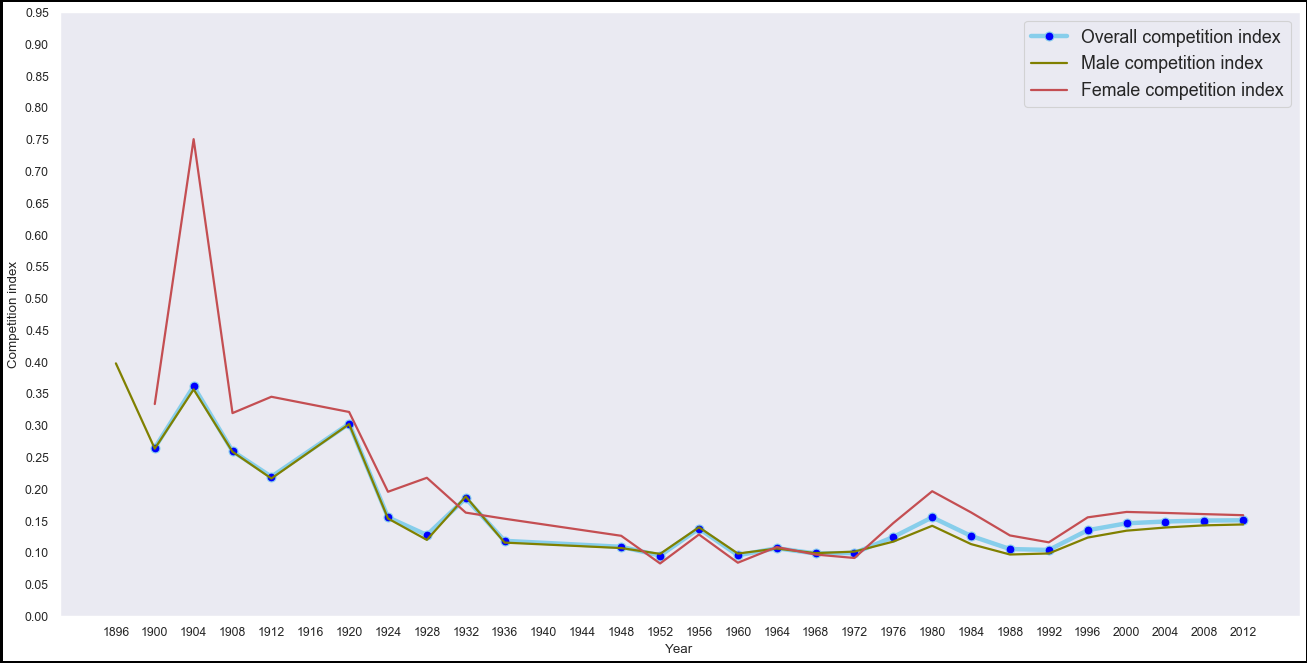

In [164]:
#Defining size, background color, edge color, resolution of the plot
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)

#Plotting X axis as Year and Y axes as competition indices
plt.plot( 'Year', 'Overall competition index', data=all_stats, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'Year', 'Male competition index', data=all_stats, marker='', color='olive', linewidth=2)
plt.plot( 'Year', 'Female competition index', data=all_stats, marker='', color='r', linewidth=2,  label="Female competition index")

#Defining scale on X and Y axis
plt.xticks(np.arange(1896, 2015, 4))
plt.yticks(np.arange(0,1,0.05))

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Competition index")
plt.show()

#Saving generated plot as JPG image
#fig.savefig('test.jpg')

Lesser the value of competition index simply means more and more individuals are participating, which also mean increased competition.

From the plot above, we can observe that competition index for men and overall index trend is going hand in hand.
But for Females, it is not quite predictable.

This trend was affected by number of factors. World wars 1 and 2 for instance in 1910 and 1940 respectively.

For females born in middle east culture, they have had lesser opportunities to excel in Sports due to several religious ideologies in their society.
But with the fall of Ottoman empire in 1922, the competition trend in females also stabilised with rest, as can be seen from the plot.

The trend have had its ups and downs.
A single global economical, political or even geographical event can produce butterfly effects on unimaginable scales at International Olympics levels.
It is so chaotic that we can never predict the future states of it properly.

What can be the reason for increasing competition levels ?
Rapid growth of human population in 20th century is definetely one of the reason.
Rapid economic, technological progress can also be one of the reason.

Let us analyse more data to come to the conclusion.

# 6. Participants and winners in Olympics

Studying the data we can try to understand how much medals we have in the recent history of the Summer Games.

![Credits to the Daily Mail for the picture](https://www.chegg.com/play/wp-content/uploads/sites/3/2016/08/metals.png)

Let's create a filtered datasets based on Gender:

For winners :

In [165]:
#Extracting only Male winners
male_olympics = primary_data[primary_data.Gender == "Men"]

#Extracting only female winners
female_olympics = primary_data[primary_data.Gender == "Women"]

For participants :

In [166]:
#Extracting only Male participants
male_in_olympics = athlete_data[(athlete_data.Sex == 'M') & (athlete_data.Season == 'Summer')]

#Extracting only Female participants
female_in_olympics = athlete_data[(athlete_data.Sex == 'F') & (athlete_data.Season == 'Summer')]

Plotting graphs based on extracted data

Text(0.0, 1.0, 'Male winners per summer olympics edition')

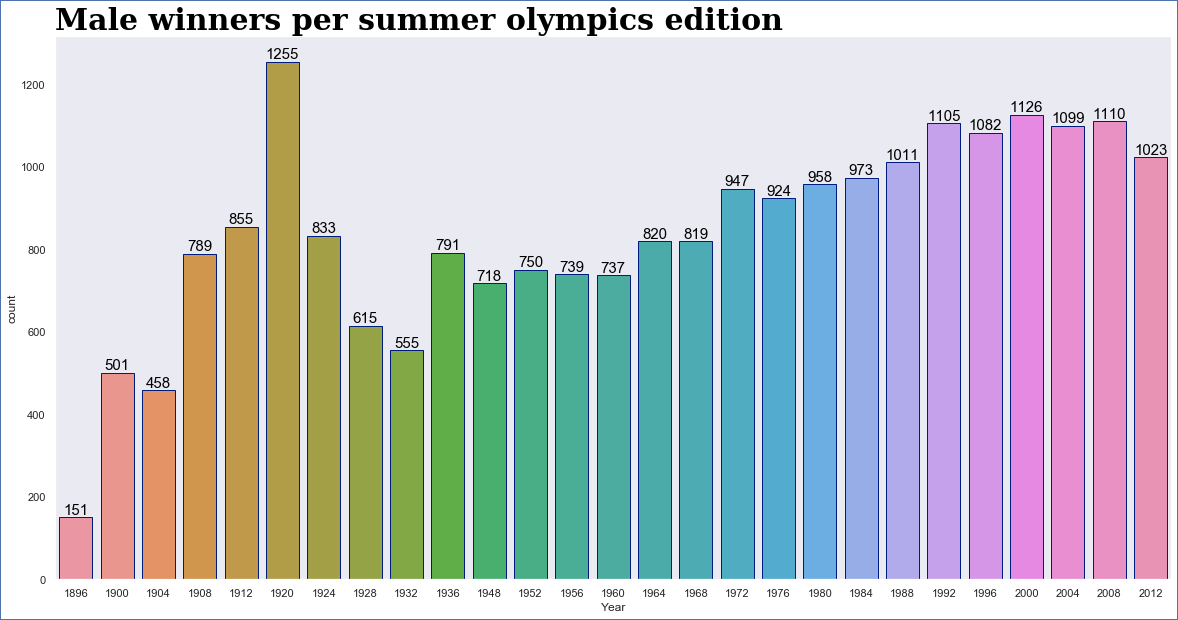

In [167]:
#Setting background styles
sns.set(style="dark")

#Setting plot size and edgecolors
plt.figure(figsize=(20, 10),edgecolor = "b",linewidth = 2)

#Creating plot
male_winners = sns.countplot(x='Year', data= male_olympics, edgecolor=sns.color_palette("dark", 1))

#Adding value labels to plot
for p in male_winners.patches:
    male_winners.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

#Manipulating title visuals
titlefont = {'family': 'serif','color':  'black','weight': 'bold','size': 30,}
plt.title('Male winners per summer olympics edition',fontdict = titlefont,loc = "left")

Text(0.0, 1.0, 'Male participants per summer olympics edition')

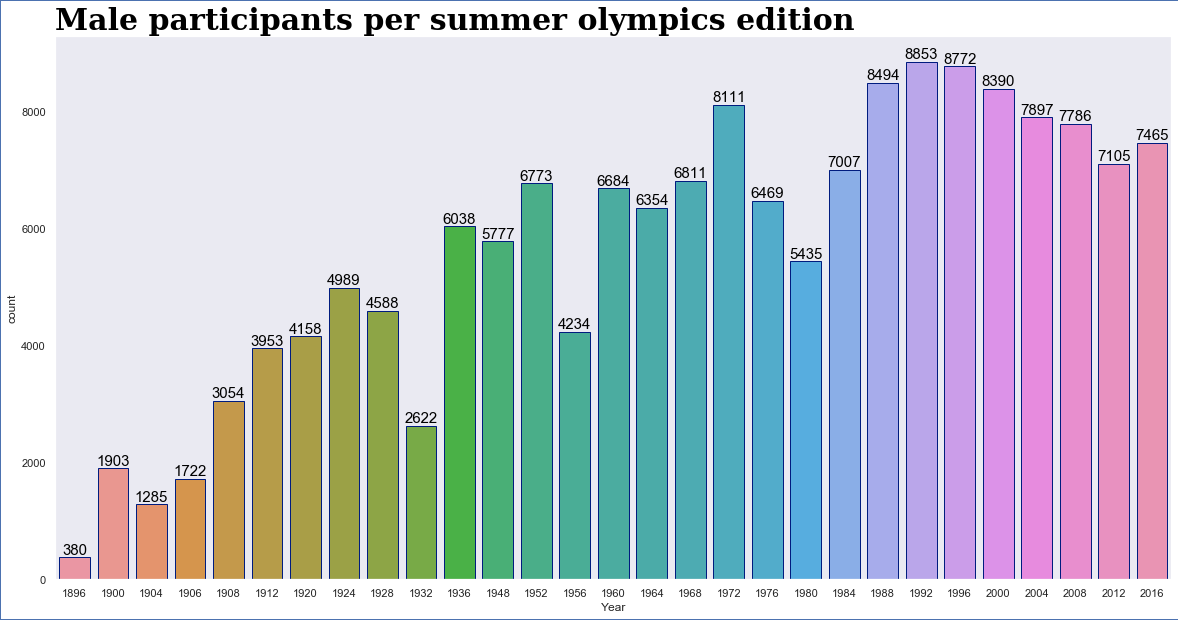

In [168]:
#Setting background styles
sns.set(style="dark")

#Setting plot size and edgecolors
plt.figure(figsize=(20, 10),edgecolor = "b",linewidth = 2)

#Creating plot
male_participants = sns.countplot(x='Year', data= male_in_olympics, edgecolor=sns.color_palette("dark", 1))

#Adding value labels to plot
for p in male_participants.patches:
    male_participants.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

#Manipulating title visuals
titlefont = {'family': 'serif','color':  'black','weight': 'bold','size': 30,}
plt.title('Male participants per summer olympics edition',fontdict = titlefont,loc = "left")

Text(0.0, 1.0, 'Female winners per summer olympics edition')

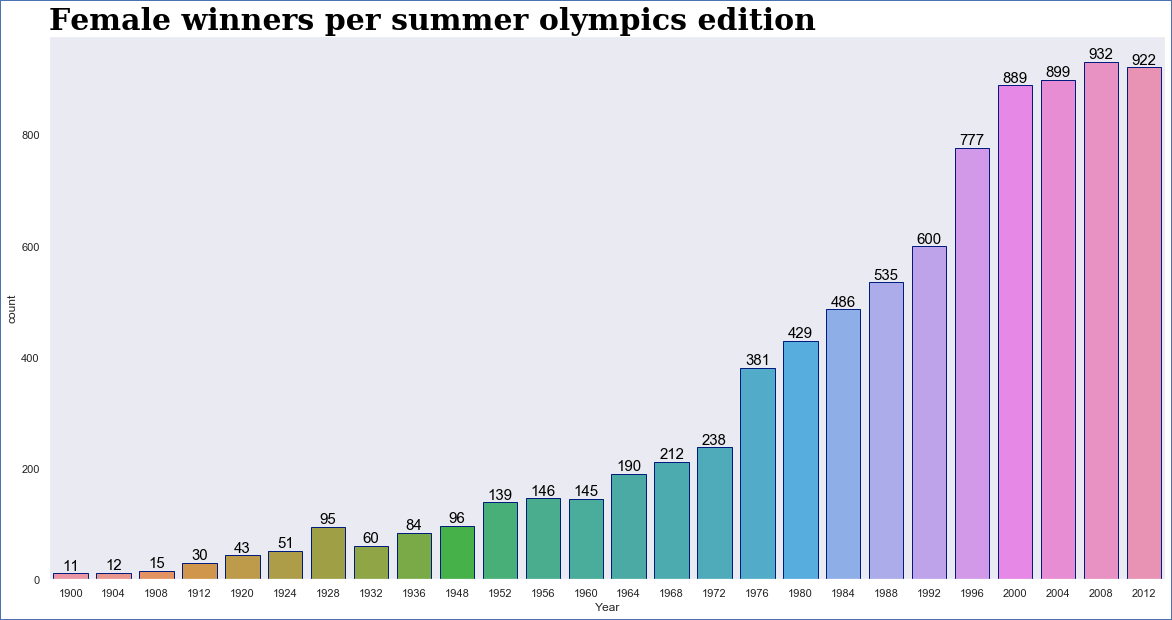

In [169]:
#Setting background styles
sns.set(style="dark")

#Setting plot size and edgecolors
plt.figure(figsize=(20, 10),edgecolor = "b",linewidth = 2)

#Creating plot
female_winners = sns.countplot(x='Year', data= female_olympics, edgecolor=sns.color_palette("dark", 1))

#Adding value labels to plot
for p in female_winners.patches:
    female_winners.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
#Manipulating title visuals
titlefont = {'family': 'serif','color':  'black','weight': 'bold','size': 30,}
plt.title('Female winners per summer olympics edition',fontdict = titlefont,loc = "left")

Text(0.0, 1.0, 'Female participants per summer olympics edition')

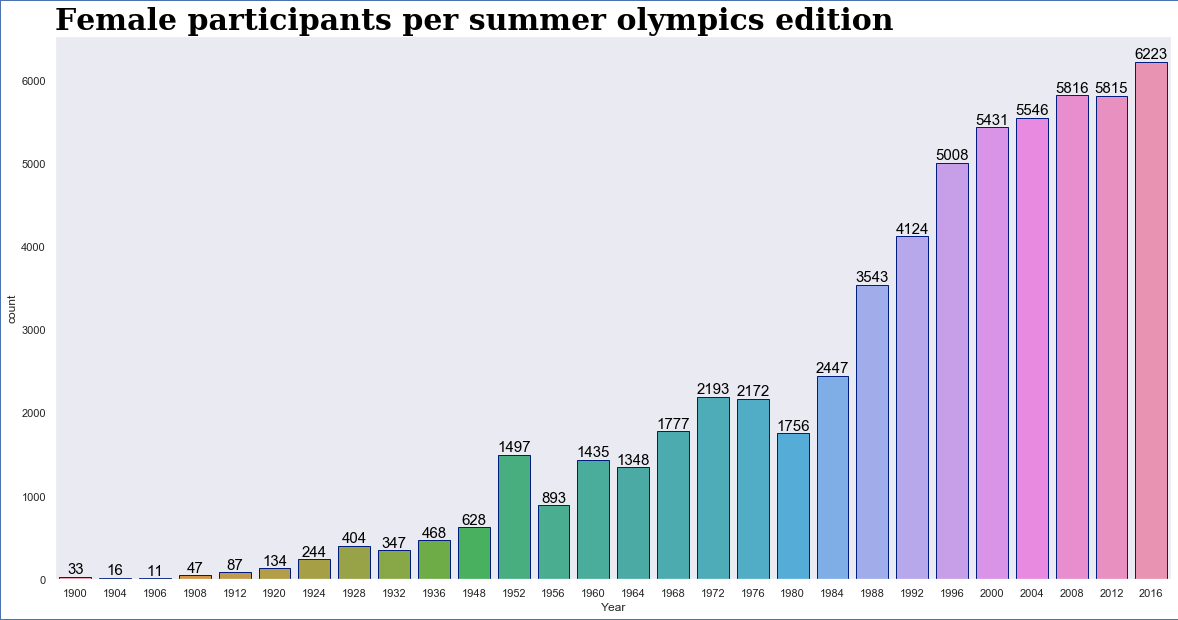

In [170]:
#Setting background styles
sns.set(style="dark")

#Setting plot size and edgecolors
plt.figure(figsize=(20, 10),edgecolor = "b",linewidth = 2)

#Creating plot
female_participants = sns.countplot(x='Year', data= female_in_olympics, edgecolor=sns.color_palette("dark", 1))

#Adding value labels to plot
for p in female_participants.patches:
    female_participants.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

#Manipulating title visuals
titlefont = {'family': 'serif','color':  'black','weight': 'bold','size': 30,}
plt.title('Female participants per summer olympics edition',fontdict = titlefont,loc = "left")

Done. Let's now review our work:

We can see both participation of athletes as well as winning medals have been on increasing trend since the beginning.

We can observe a sharp increase in winner tally in 1920 olympics.
Wonder what made it like that ?

The 1920 Olympics were awarded to Antwerp in hopes of bringing a spirit of renewal to Belgium, which had been devastated during World War I. 
The defeated countries — Germany, Austria, Hungary, Bulgaria, and Turkey—were not invited.

Well, that explains the plot as lesser participants were there.

# 7. Medals per country

Let us do Pareto analysis for the top 2 countries :

In [171]:
#Creating a dataframe about medals won per country
totalMedals = pd.DataFrame(primary_data["Winning country"].value_counts())

#Adding column to dataframe for pareto analysis
totalMedals["cumpercentage"] = totalMedals["Winning country"].cumsum()/totalMedals["Winning country"].sum()*100

#Limiting analysis to top 30 countries
totalMedals = totalMedals.head(30)
totalMedals.head()

,Winning country,cumpercentage
USA,4585,14.884431
Russia,3040,24.753279
Germany,2620,33.258668
UK,1720,38.842358
France,1396,43.374237


Let's plot this:

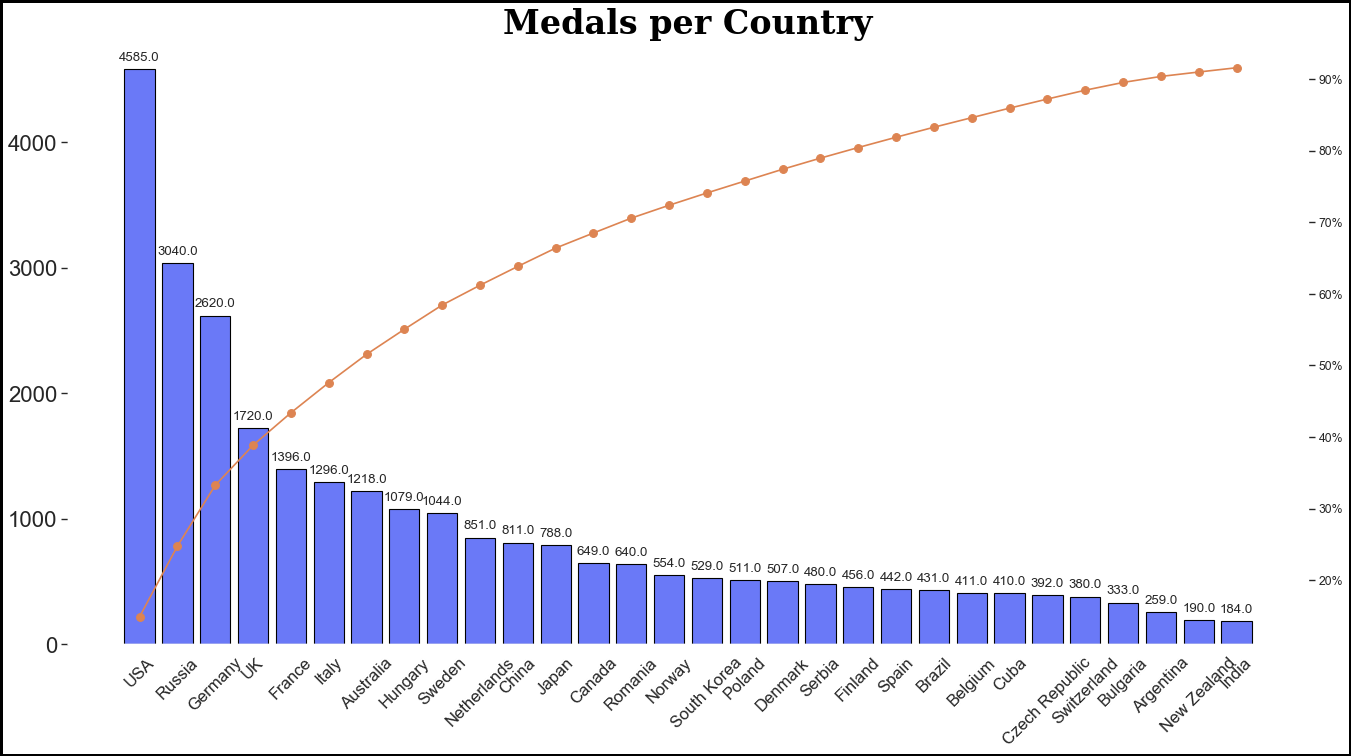

In [172]:
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3) 

ax = fig.add_subplot()
plt.grid(b=None)
ax.set_facecolor("white")

ax.bar(totalMedals.index, totalMedals["Winning country"], color="#6a79f7",width = 0.8,edgecolor='black',linewidth=1)
ax2 = ax.twinx()
ax2.plot(totalMedals.index, totalMedals["cumpercentage"], color="C1", marker="o", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=15, labelrotation = 45)

#Adding labels to end of each bar
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.title('Medals per Country',fontdict = titlefont,loc = "center")
plt.show()
#fig.savefig("Medals per Country.jpg")

The USA seems to be the most winning country with almost 14% of all medals.

Next comes the Russia.
Commenting about winners in russia gets instantly complicated as data is about pre Mikhail Gobrachev sovient unions and modern Russia combined.

Germany, even though being archvillain for the first half of the 20th Century, still manages to hold 3rd place in all time winners.

On 4th position, comes the Great Britain.

Italy holds 5th position.

These 5 countries have had fair shares of Wars in 20th century.

**It is notable coincidence to find these countries in top 5 as all of them had explicit involvement in both of the world wars.**

From pareto analysis, it is the Top 20 countries which holds 80% of all medals.

# 8. Olympic performance variation with Economic progress of nation

GDP of a nation determines its dominating power at global level.
Can GDP affect number of winners produced by a nation ?

Generally, greater the GDP of nation, more benefits the citizens of that nation gets from Government.

Might this be enough to aid one become Olympics elite ?

However, modern day GDP is a concept that has been introduced just 70 days ago.
So, we are limited by data in those terms.
We can analyse recent events only.

Let us analyse USA in these terms.

In [173]:
#Makind dataframe
usa = primary_data[(primary_data.NOC == "USA") & (primary_data.Year >1959)]

#Making winning trend dataframe
usa_winning_trend = pd.DataFrame(usa.Year.value_counts())

#Sorting by Year
usa_winning_trend.sort_index(inplace = True)
usa_winning_trend.reset_index(inplace = True)

#Renaming columns
usa_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)
usa_winning_trend.head()

,Year,Medals trend
0,1960,112
1,1964,150
2,1968,149
3,1972,155
4,1976,155


In [174]:
#gdp[(gdp.Code == "USA") & (gdp.Year%4 == 0) & (gdp.Year < 2013)] ... not feasible due to missing Year values in Dataframe

#Only years when olympics happened
options = primary_data.Year.unique()

#Limiting data to specific years
usa_gdp_trend = gdp[(gdp.Code == "USA") & (gdp.Year.isin(options))]
usa_gdp_trend = usa_gdp_trend[["Year","GDP"]].copy()
usa_gdp_trend.head()

,Year,GDP
249,1960,3.441682e+12
1305,1964,4.307727e+12
2361,1968,4.758687e+12
3417,1972,5.436462e+12
4473,1976,6.313128e+12


Let's merge both the dataframes into one

In [175]:
#Merging dataframe
usa_medal_gdp = pd.merge(left = usa_winning_trend, right = usa_gdp_trend, on = "Year" )
usa_medal_gdp.set_index("Year",inplace = True)
usa_medal_gdp.head()

,Medals trend,GDP
Year,,
1960,112,3.441682e+12
1964,150,4.307727e+12
1968,149,4.758687e+12
1972,155,5.436462e+12
1976,155,6.313128e+12


The scales of both columns is vastly different.
To plot graphs from this data, we will try to Normalise GDP values to Y axis scale.

Normalization is done by multiplying each GDP value by average of total medals won by Country.

In [176]:
#Dividing GDP values by maximum of them and multiplying by 300 to match Y axis scale
usa_medal_gdp.GDP = usa_medal_gdp.GDP*usa_medal_gdp["Medals trend"].mean()/usa_medal_gdp.GDP.max()
usa_medal_gdp.tail()

,Medals trend,GDP
Year,,
1996,260,153.863617
2000,248,172.457454
2004,264,196.041221
2008,315,199.370671
2012,250,216.000000


Now that we have data ready, let us plot.

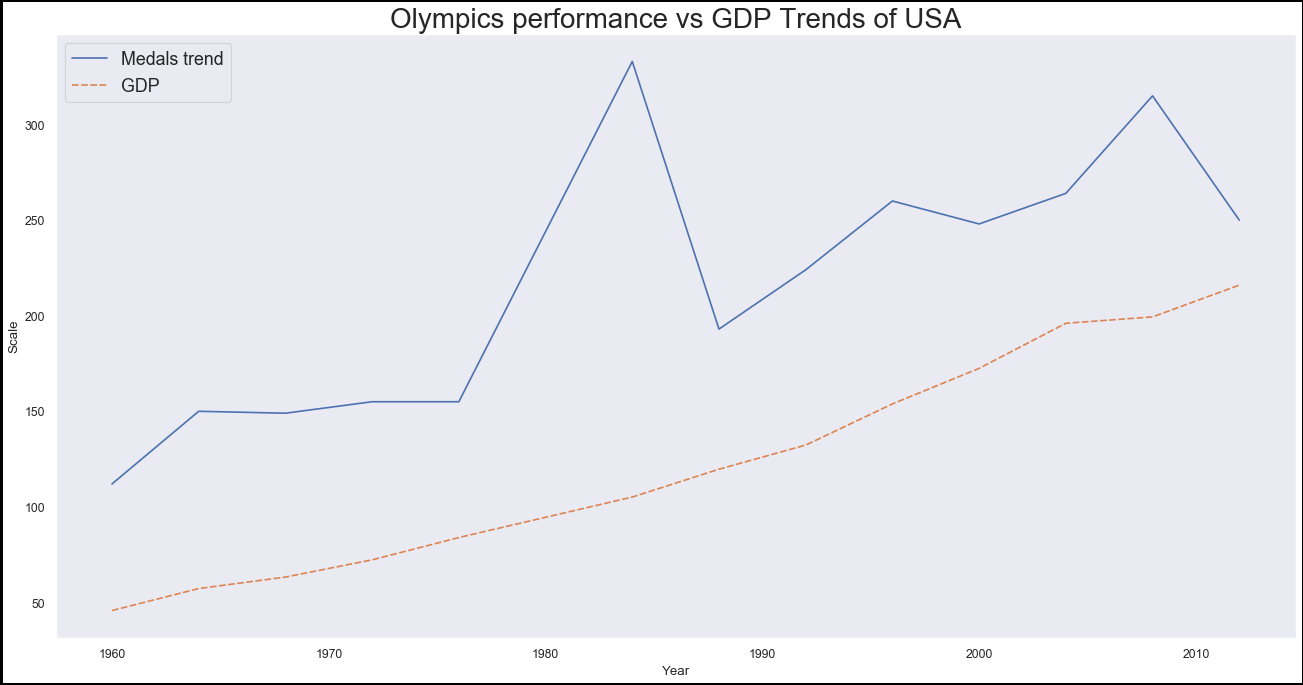

In [177]:
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = usa_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends of USA",size =25)
plt.show()

The sudden spike in 1980s GDP of USA can be connected to massive technological growth that came when Computers started becoming a global Personal entity.

Rest, since both trends are going upwards, we can conclude GDP indeed affects the sporting performace.

Let us try to deduce same about Russia and Germany to confirm the hypothesis.

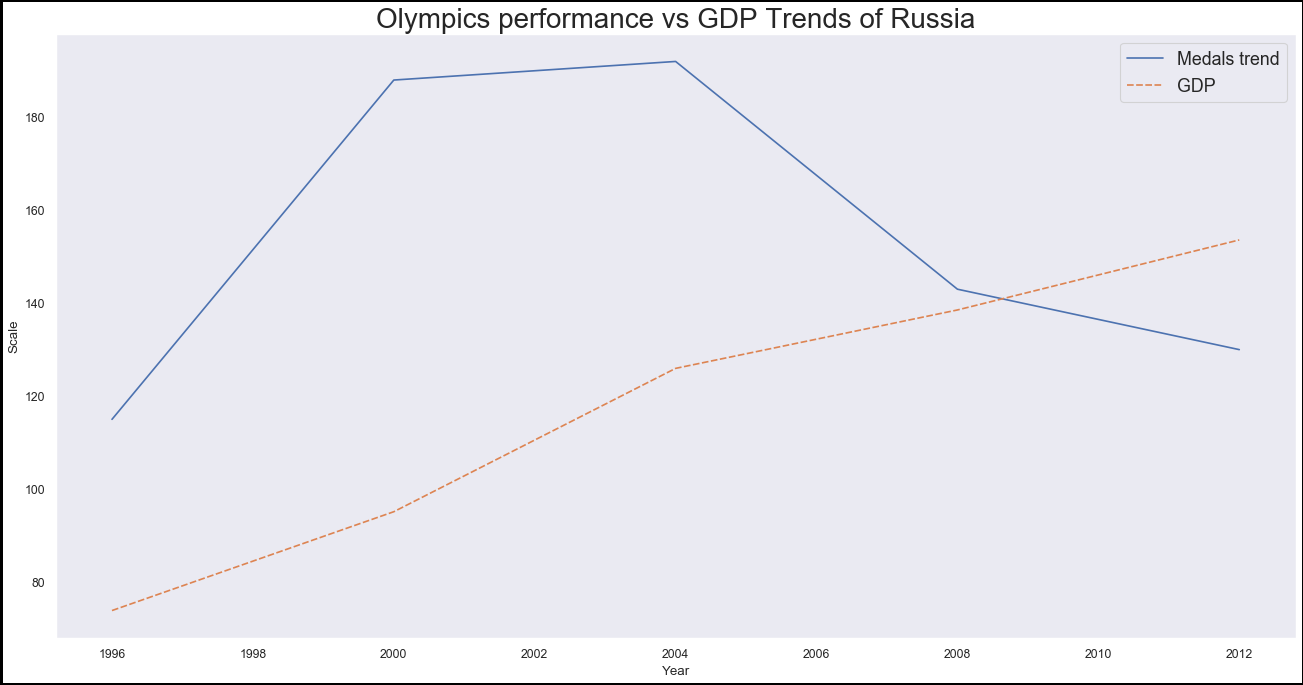

In [178]:
#Makind datagbrme
rus = primary_data[(primary_data.NOC == "RUS") & (primary_data.Year >1959)]
#Making winning trend datagbrme
rus_winning_trend = pd.DataFrame(rus.Year.value_counts())

#Sorting by Year
rus_winning_trend.sort_index(inplace = True)
rus_winning_trend.reset_index(inplace = True)

#Renaming columns
rus_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
rus_gdp_trend = gdp[(gdp.Code == "RUS") & (gdp.Year.isin(options))]
rus_gdp_trend = rus_gdp_trend[["Year","GDP"]].copy()

#Merging datagbrme
rus_medal_gdp = pd.merge(left = rus_winning_trend, right = rus_gdp_trend, on = "Year" )
rus_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by maximum medal count in DataFrame to match Y axis scale
rus_medal_gdp.GDP = rus_medal_gdp.GDP*rus_medal_gdp["Medals trend"].mean()/rus_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = rus_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends of Russia",size =25)
plt.show()

As expected, no insights can be drawn from Russian GDP and Medals trend.
Primary reason being, the recent political events came through game changing decisions by Mikhail Gorbachev, the last president of Soviet Union.

In [179]:
#Makind dataframe
deu = primary_data[(primary_data.NOC == "GER") & (primary_data.Year >1959)]
deu
#Making winning trend dataframe
deu_winning_trend = pd.DataFrame(deu.Year.value_counts())

#Sorting by Year
deu_winning_trend.sort_index(inplace = True)
deu_winning_trend.reset_index(inplace = True)

#Renaming columns
deu_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)
deu_winning_trend.head()

,Year,Medals trend
0,1992,198
1,1996,124
2,2000,119
3,2004,149
4,2008,101


Whoa. There is very less data regarding Germany too.
Again, World Wars are to blame.

Apparently, Germany and Japan was banned from participating in Olympics because of numerous atrocities done by them in 1940s.

Let's move to next country on the list; The United Kigdom.

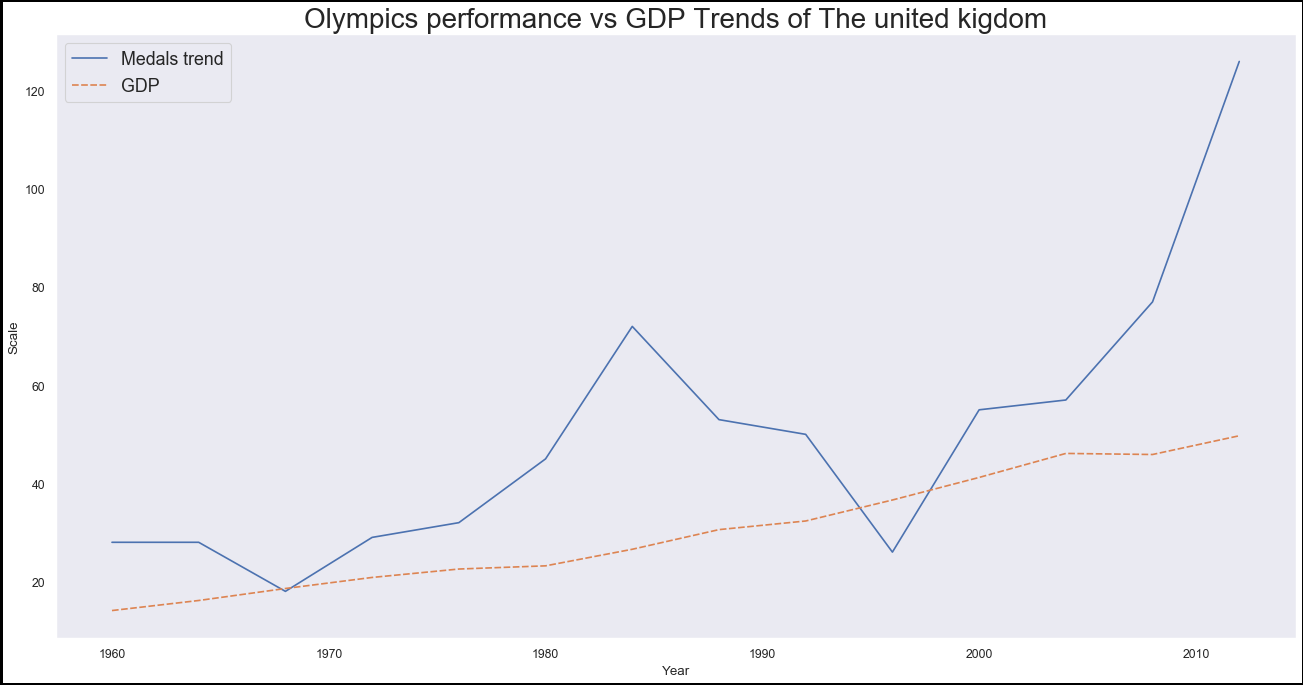

In [180]:
#Makind datagbrme
gbr = primary_data[(primary_data.NOC == "GBR") & (primary_data.Year >1959)]
gbr
#Making winning trend datagbrme
gbr_winning_trend = pd.DataFrame(gbr.Year.value_counts())

#Sorting by Year
gbr_winning_trend.sort_index(inplace = True)
gbr_winning_trend.reset_index(inplace = True)

#Renaming columns
gbr_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
gbr_gdp_trend = gdp[(gdp.Code == "GBR") & (gdp.Year.isin(options))]
gbr_gdp_trend = gbr_gdp_trend[["Year","GDP"]].copy()

#Merging datagbrme
gbr_medal_gdp = pd.merge(left = gbr_winning_trend, right = gbr_gdp_trend, on = "Year" )
gbr_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by maximum medal count in DataFrame to match Y axis scale
gbr_medal_gdp.GDP = gbr_medal_gdp.GDP*gbr_medal_gdp["Medals trend"].mean()/gbr_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = gbr_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends of The united kigdom",size =25)
plt.show()

Let's check about next coutry on the list, The Francos !

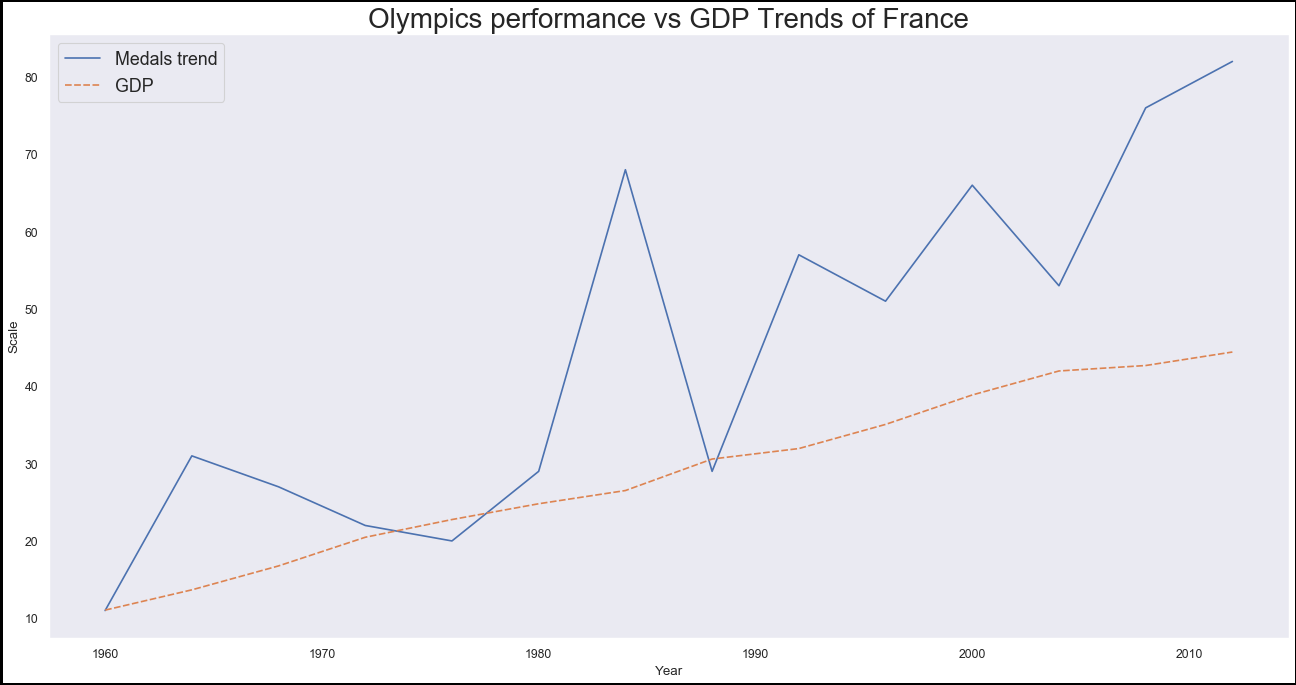

In [181]:
#Makind dataframe
fra = primary_data[(primary_data.NOC == "FRA") & (primary_data.Year >1959)]
fra
#Making winning trend dataframe
fra_winning_trend = pd.DataFrame(fra.Year.value_counts())

#Sorting by Year
fra_winning_trend.sort_index(inplace = True)
fra_winning_trend.reset_index(inplace = True)

#Renaming columns
fra_winning_trend.rename(columns={"index":"Year","Year":"Medals trend"},inplace = True)

#Limiting data to specific years
fra_gdp_trend = gdp[(gdp.Code == "FRA") & (gdp.Year.isin(options))]
fra_gdp_trend = fra_gdp_trend[["Year","GDP"]].copy()

#Merging dataframe
fra_medal_gdp = pd.merge(left = fra_winning_trend, right = fra_gdp_trend, on = "Year" )
fra_medal_gdp.set_index("Year",inplace = True)

#Dividing GDP values by maximum of them and multiplying by 300 to match Y axis scale
fra_medal_gdp.GDP = fra_medal_gdp.GDP*fra_medal_gdp["Medals trend"].mean()/fra_medal_gdp.GDP.max()

#Plotting graph
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)
sns.lineplot(data = fra_medal_gdp)

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Scale")
plt.title("Olympics performance vs GDP Trends of France",size =25)
plt.show()

# 9. Olympics performance variations with its Happiness index

In [182]:
top_country = totalMedals.copy()
top_country.reset_index(inplace = True)
top_country.rename(columns = {"index":"Country"},inplace = True)
top_country = pd.DataFrame(top_country.Country.copy())
top_country["Rank"] = top_country.index + 1
top_country.head()

,Country,Rank
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


In [183]:
happy_country = pd.DataFrame(happiness["Country"].copy().head(30))
happy_country['Rank'] = happy_country.index + 1
happy_country.head()

,Country,Rank
0,Norway,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Finland,5


Let us manually check the 30 Country names as there seems to be issue related to Data.
Let's fix this by renaming those values.

In [184]:
top_country.replace(["USA","UK"], ["United States","United Kingdom"],inplace=True)
top_country.head()

,Country,Rank
0,United States,1
1,Russia,2
2,Germany,3
3,United Kingdom,4
4,France,5


In [185]:
merged = pd.merge(left = top_country,right = happy_country,on = "Country")
merged.rename(columns = {"Rank_x":"Medal Rank","Rank_y":"Happiness index Rank"},inplace = True)
count = merged.Country.count() + 1
merged["Sr No."] = range(1,count)
merged.set_index("Sr No.",inplace = True)
merged

,Country,Medal Rank,Happiness index Rank
Sr No.,,,
1,United States,1,14
2,Germany,3,16
3,United Kingdom,4,19
4,Australia,7,10
5,Sweden,9,9
6,Netherlands,10,6
7,Canada,13,7
8,Norway,15,1
9,Denmark,18,2


We can see many nations which have higher happiness index also have performed well at Olympics.

16 of top 30 countries which performed well in Olympics also have happiness index in top 30.
This is more than 50%.
We can conclude from the data that more happy the people of country are, more their performance across Olympic games occurs.

Our observation seems correct.

# 10. Countrywise participation

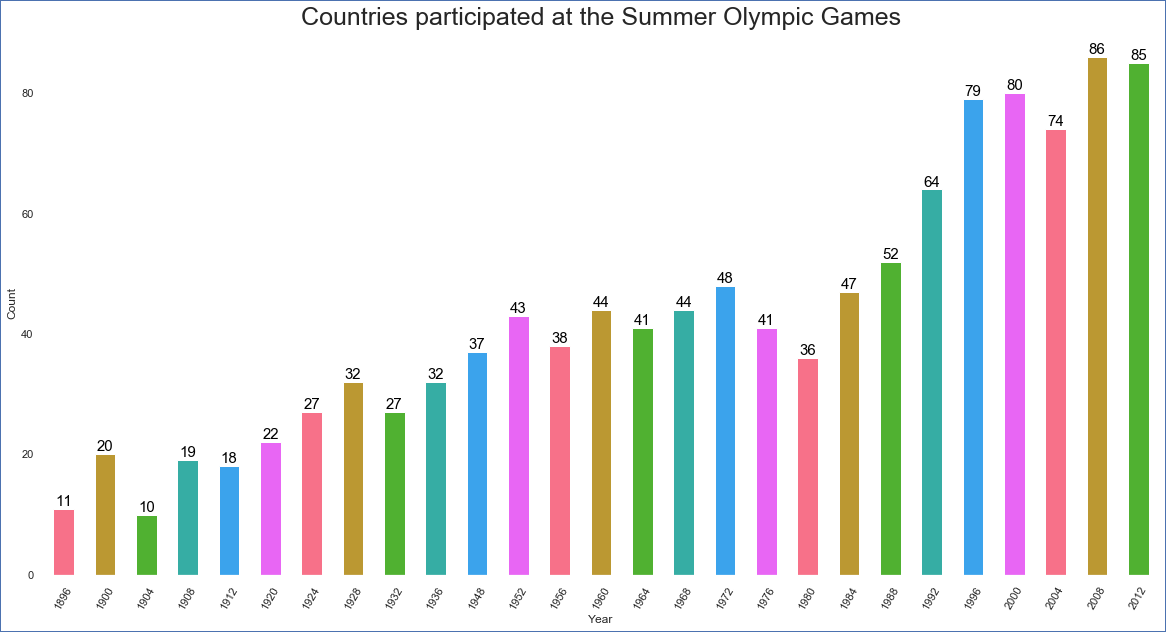

In [186]:
sns_fig3 = plt.figure(figsize=(20, 10),edgecolor = "b",linewidth = 2)
plt.subplot(111)
ax = primary_data.groupby("Year")["NOC"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                  edgecolor=  "w"*primary_data["Year"].nunique())

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

plt.xticks(rotation = 60)
ax.set_facecolor("w")
plt.ylabel("Count")
plt.title("Countries participated at the Summer Olympic Games",size = 25)
plt.grid(True,alpha=.3)
plt.show()
#sns_fig3.savefig("Countries per year.jpg")

# 11. Heatmap of yearwise sports

Let us plot a corelation heatmap between sport events and year.

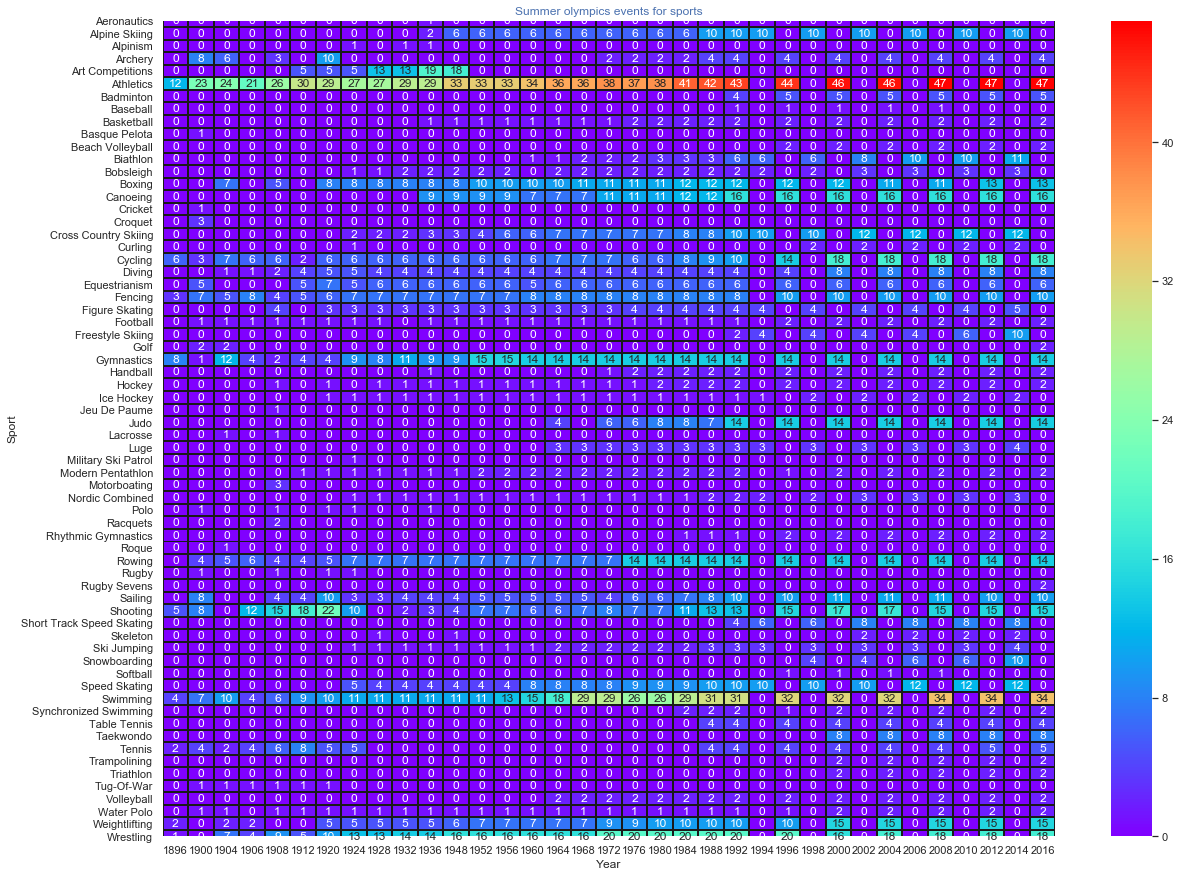

In [187]:
sum_sp = pd.pivot_table(index="Sport",columns="Year",data=athlete_data,
                        values="Event",aggfunc="nunique")
sum_sp = sum_sp.fillna(0)
x = plt.figure(figsize=(20,15))
sns.heatmap(sum_sp,linewidth=1,annot=True,cmap="rainbow",linecolor="k")

plt.title("Summer olympics events for sports",color="b")
plt.show()
#x.savefig("heatmap.jpg")

# 12. Indians at Olympics

In [188]:
#Extracting India only to dataframe
Indian_medals=primary_data[primary_data.NOC=='IND']

#Counting medals won by Indians
pd.DataFrame(Indian_medals.Medal.value_counts())

,Medal
Gold,128
Bronze,38
Silver,18


So, India have won 128 Gold medals, 18 Silver medals and 38 Bronze medals overall.
However, Hockey is a game played in Teams.

We shall extract medals won at Hockey by India only.

In [189]:
ind_hockey = Indian_medals[Indian_medals.Event == "Hockey"]
print("Hockey events won by India at summer Olympics = ", len(ind_hockey.Year.unique()))
ind_hockey.head()

Hockey events won by India at summer Olympics =  11


,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,Winning country
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold,India
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold,India
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold,India
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold,India
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold,India


In [190]:
ind_hockey_med = ind_hockey.Medal.value_counts().reset_index().rename(columns = {"index":"Medal","Medal":"Medal count in Hockey"})
ind_hockey_med

,Medal,Medal count in Hockey
0,Gold,127
1,Bronze,29
2,Silver,13


As an Indian proud of its diverse culture, it is disheartneing to see a country with 52 % agricultural land as well as about 20 % of world population has performed well at Summer Olympics only at Hockey.

Maybe governments can help nourish the sport culture in India someday in future.

In [191]:
ind_med = Indian_medals.Medal.value_counts().reset_index().rename(columns = {"index":"Medal","Medal":"Medal count"})
ind_med

,Medal,Medal count
0,Gold,128
1,Bronze,38
2,Silver,18


In [192]:
merged = pd.merge(left = ind_med, right = ind_hockey_med, on = "Medal")
merged["% wins at Hockey"] = merged["Medal count in Hockey"]*100/merged["Medal count"]
merged

,Medal,Medal count,Medal count in Hockey,% wins at Hockey
0,Gold,128,127,99.218750
1,Bronze,38,29,76.315789
2,Silver,18,13,72.222222


Plotting Pie chart for Indian medals

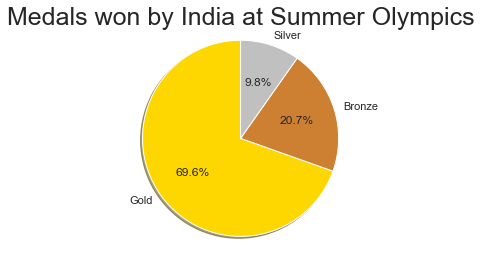

In [193]:
labels = np.array(ind_med.Medal)
sizes = np.array(ind_med["Medal count"])
colors = ['gold', '#cd7f32', 'silver']

# Plot
ind_med_pie = plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Medals won by India at Summer Olympics",size = 25)
plt.show()

# 13. Genderwise medals by India

In [194]:
ind_male_med = Indian_medals[Indian_medals.Gender == "Male"]
ind_male_med = ind_male_med.Medal.value_counts().reset_index().rename(columns = {"index":"Medal","Medal":"Count"})
ind_male_med

,Medal,Count
0,Silver,0
1,Gold,0
2,Bronze,0


In [195]:
ind_female_med = Indian_medals[Indian_medals.Gender == "Female"]
ind_female_med = ind_female_med.Medal.value_counts().reset_index().rename(columns = {"index":"Medal","Medal":"Count"})
ind_female_med

,Medal,Count
0,Silver,0
1,Gold,0
2,Bronze,0


From data above, it is clear that no Female from India have won medals at Olympics till 2012.

This does not mean Indian women are not Athletic.
Athletic skills are Normally distributed.
Indians seriously need to consider sport encouragement and awareness among Women in order to excel there.

Let us analyse how Indians performed yearwise at Olympics.

# 14. Yearwise medals by India

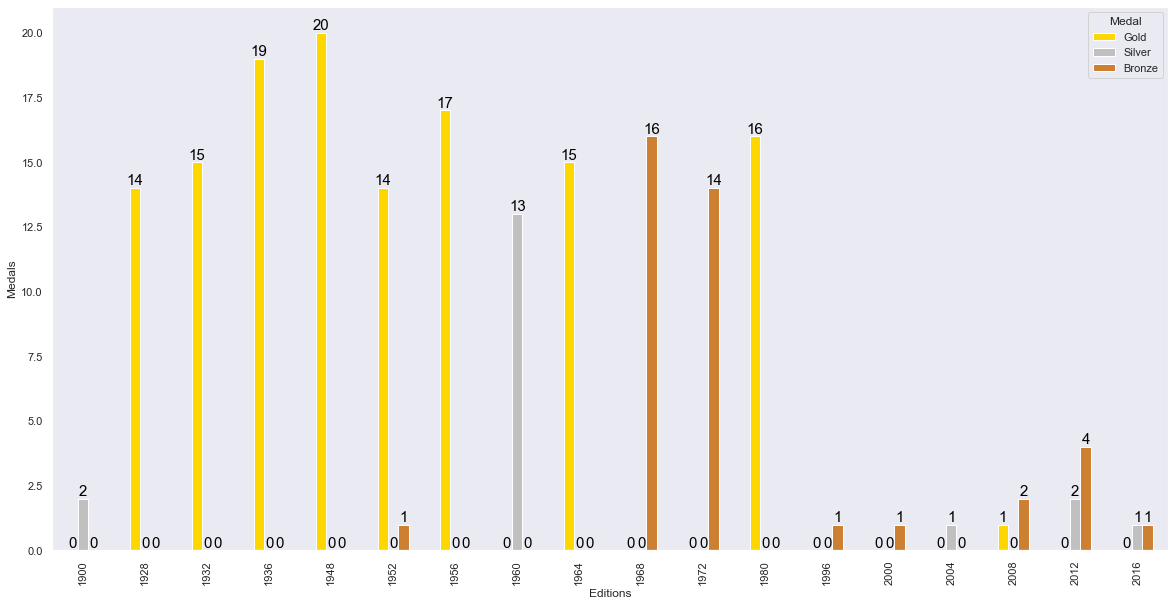

In [196]:
#Function to produce barplots for yearwise country performace
def country_performance(cntr, edition):
    if edition=='Summer':
        data_cs = data_summer.groupby(['Year','NOC','Medal'])['NOC','Year','Medal'].size().reset_index(name='Count')
        data_cntr = data_cs[data_cs['NOC']==cntr]
        table = data_cntr.pivot_table(values='Count', index=['Year', 'NOC'], columns=['Medal'], aggfunc=np.sum)
        tab = table.reset_index()
        u = tab.plot.bar(x='Year', y=['Gold','Silver', 'Bronze'], color=["gold", "silver", '#cd7f32'])
        for p in u.patches:
            u.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
        plt.xlabel('Editions')
        plt.ylabel('Medals')
        fig=plt.gcf()
        fig.set_size_inches(20,10)
        plt.show()
    else:
        data_cw = data_winter.groupby(['Year','NOC','Medal'])['NOC','Year','Medal'].size().reset_index(name='Count')
        data_cntr = data_cw[data_cw['NOC']==cntr]
        table = data_cntr.pivot_table(values='Count', index=['Year', 'NOC'], columns=['Medal'], aggfunc=np.sum)
        tab = table.reset_index()
        tab.plot.bar(x='Year', y=['Gold','Silver', 'Bronze'], color=["gold", "silver", "g"])
        plt.xlabel('Editions')
        plt.ylabel('Medals')
        fig=plt.gcf()
        fig.set_size_inches(20,10)
        plt.show()
        
#Indians at Olympics
data_summer = athlete_data[athlete_data.Season == "Summer"]
country_performance("IND","Summer")

# 15. Conclusions

1. From the analysis, it is clear that economic prosperity do aid the Olympic performance by any country.

2. Competition has been increasing ever since inception of Olympics.

3. For India, there needs to be effort from government side about sports awareness, especially, for females.

4. Happy countries have also shown to perform good at Olympics.

5. The two Wars world witnessed in 20th century have affected Olympics results on massive scales.

6. Athletics and Swimming, being organized every year, are at the core of Olympics.